In [2]:
# 1.	Выбор совокупности основных статистических показателей функционирования объекта исследования и сбор ИСД по ним.
# 2.	Вычисление основных статистических характеристик ИСД: оценок математического ожидания (среднего); среднего квадратического (стандартного) отклонения; ошибки вычисления среднего значения; медианы; асимметрии; эксцесса и их ошибок; построение доверительных интервалов.
# 3.	Оценка нормальности распределения ИСД (их подчинения нормальному закону);
# 4.	Временное прогнозирование.
# 5.	Вычисление парных коэффициентов линейной корреляции.
# 6.	Методы отбора признаков (используя различные критерии: BIC, AIC, среднеквадратическое отклонение)
# 7.	Факторный анализ
# 8.	Кластерный анализ
# 9.	Получение уравнений регрессии, представляющих собой зависимость результативных показателей эффективности работы предприятия от влияющих на него производственно-экономических факторов (нейронная сеть (рассмотреть различные методы формирования нейронных сетей)).
# 10.	Дисперсионный анализ
# 11.	Оптимизация значений выходных факторов и результативных показателей эффективности с целью принятия управляющего решения.

from scipy import stats
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from factor_analyzer import FactorAnalyzer

# Загрузка датасета
df = pd.read_csv('../data/spotify_top_songs.csv')

# 1.	Выбор совокупности основных статистических показателей функционирования объекта исследования и сбор ИСД по ним.


# Показываем первые 5 строк датасета для предварительного осмотра
print(df.head())

# Проверка на наличие пропущенных значений
print(df.isnull().sum())


               spotify_id                                            name  \
0  7gaA3wERFkFkgivjwbSvkG                                       yes, and?   
1  0R6NfOiLzLj4O5VbYSJAjf                                       La Diabla   
2  3rUGC1vUpkDG9CZFHMur1t                                          greedy   
3  3vkCueOmm7xQDoJ17W1Pm3                           My Love Mine All Mine   
4  7CyPwkp0oE8Ro9Dd5CUDjW  One Of The Girls (with JENNIE, Lily Rose Depp)   

                              artists  daily_rank  daily_movement  \
0                       Ariana Grande           1               0   
1                                Xavi           2               0   
2                          Tate McRae           3               0   
3                              Mitski           4               3   
4  The Weeknd, JENNIE, Lily-Rose Depp           5               1   

   weekly_movement country snapshot_date  popularity  is_explicit  ...  key  \
0               49     NaN    2024-01-16   

In [3]:
# 2.	Вычисление основных статистических характеристик ИСД: оценок математического ожидания (среднего); среднего квадратического (стандартного) отклонения; ошибки вычисления среднего значения; медианы; асимметрии; эксцесса и их ошибок; построение доверительных интервалов.

# Функция для расчета статистических характеристик
def calculate_statistics(column):
    mean = df[column].mean()  # Среднее значение
    std = df[column].std()    # Стандартное отклонение
    median = df[column].median()  # Медиана
    skewness = df[column].skew()  # Асимметрия
    kurtosis = df[column].kurtosis()  # Эксцесс

    # Доверительный интервал (95%)
    confidence_interval = stats.norm.interval(0.95, loc=mean, scale=std / len(df[column]) ** 0.5)

    return mean, std, median, skewness, kurtosis, confidence_interval

# Применение функции к столбцу 'popularity'
stats_popularity = calculate_statistics('popularity')
print(f"Статистика для 'popularity':\nСреднее: {stats_popularity[0]}, Стандартное отклонение: {stats_popularity[1]}, Медиана: {stats_popularity[2]}, Асимметрия: {stats_popularity[3]}, Эксцесс: {stats_popularity[4]}, Доверительный интервал: {stats_popularity[5]}")


Статистика для 'popularity':
Среднее: 77.52575870886808, Стандартное отклонение: 15.981984977537369, Медиана: 82.0, Асимметрия: -1.2747801999073618, Эксцесс: 2.8366819519400477, Доверительный интервал: (77.47136344712162, 77.58015397061455)


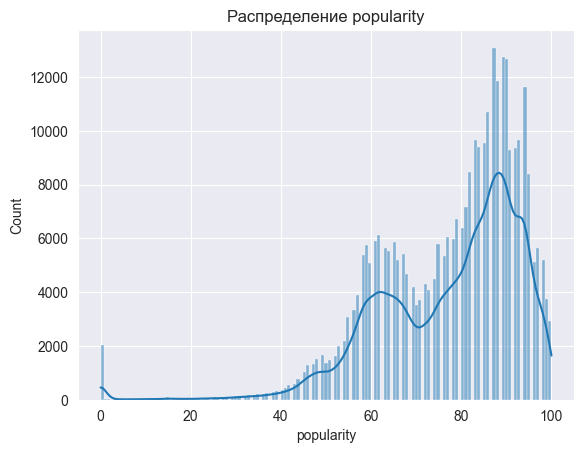

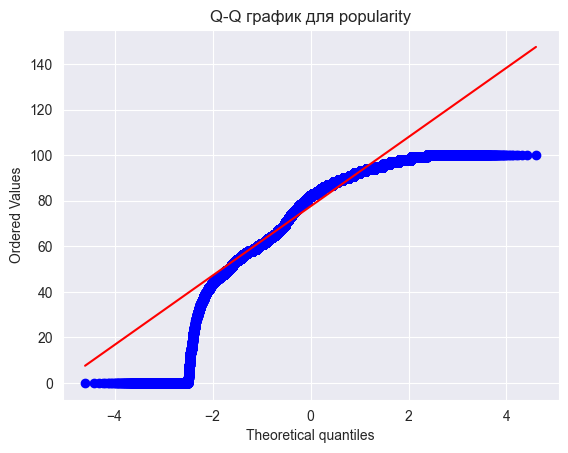

In [4]:
# 3.	Оценка нормальности распределения ИСД (их подчинения нормальному закону);

# Загрузка датасета


# Гистограмма для 'popularity'
sns.histplot(df['popularity'], kde=True)
plt.title('Распределение popularity')
plt.show()

# Q-Q график для 'popularity'
stats.probplot(df['popularity'], dist="norm", plot=plt)
plt.title('Q-Q график для popularity')
plt.show()


In [5]:
# Тест Шапиро-Уилка для 'popularity'
shapiro_test = stats.shapiro(df['popularity'])
print(f"Тест Шапиро-Уилка: статистика = {shapiro_test[0]}, p-значение = {shapiro_test[1]}")


Тест Шапиро-Уилка: статистика = 0.9064605832099915, p-значение = 0.0


C:\dev\bigdatacoursework\.venv\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


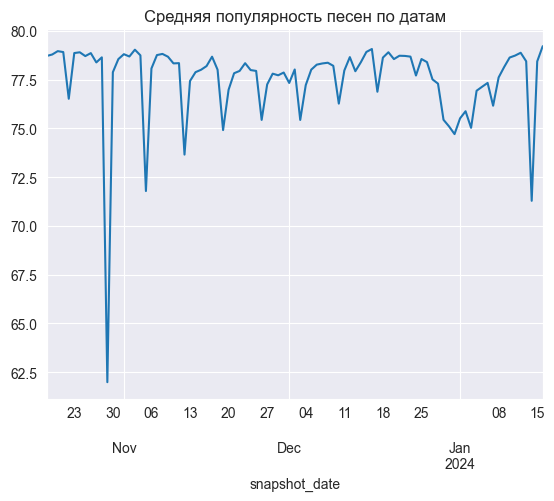

ADF Statistic: -3.350012
p-value: 0.012786
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[14] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(0,0,0)(0,0,0)[14] intercept   : AIC=406.546, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[14] intercept   : AIC=419.539, Time=0.31 sec
 ARIMA(0,0,1)(0,0,1)[14] intercept   : AIC=398.912, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[14]             : AIC=1052.129, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[14] intercept   : AIC=408.295, Time=0.02 sec
 ARIMA(0,0,1)(1,0,1)[14] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,0,1)(0,0,2)[14] intercept   : AIC=395.991, Time=0.14 sec
 ARIMA(0,0,1)(1,0,2)[14] intercept   : AIC=397.969, Time=0.53 sec
 ARIMA(0,0,0)(0,0,2)[14] intercept   : AIC=395.026, Time=0.10 sec
 ARIMA(0,0,0)(0,0,1)[14] intercept   : AIC=397.938, Time=0.05 sec
 ARIMA(0,0,0)(1,0,2)[14] intercept   : AIC=394.091, Time=0.55 sec
 ARIMA(0,0,0)(1,0,1)[14] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,0,0)(2,0,2)[14] intercept   : AIC=400.501, Time=0.74 sec
 

C:\dev\bigdatacoursework\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


2024-01-17    76.206900
2024-01-18    77.531273
2024-01-19    77.694923
2024-01-20    77.816848
2024-01-21    76.750308
2024-01-22    78.019581
2024-01-23    78.272671
2024-01-24    78.239807
2024-01-25    78.206585
2024-01-26    77.577862
Freq: D, Name: predicted_mean, dtype: float64


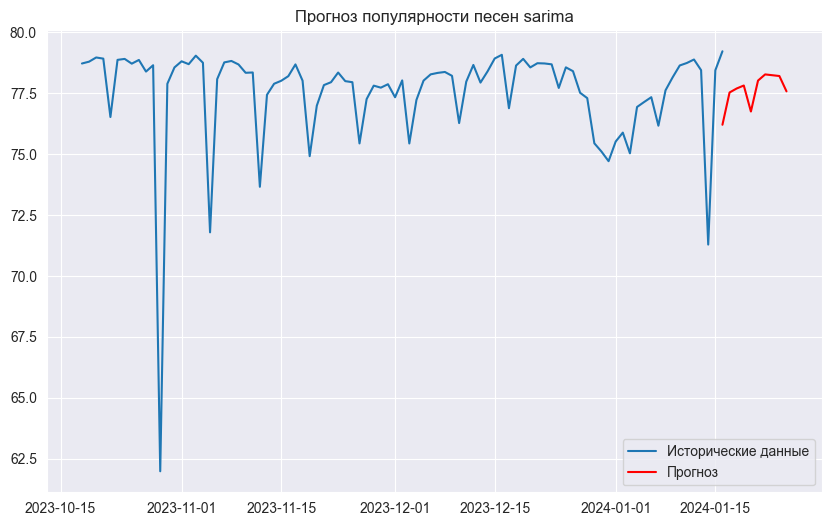

In [6]:
# 4.	Временное прогнозирование.

# Загрузка и предварительная обработка данных

df['snapshot_date'] = pd.to_datetime(df['snapshot_date'])
df.sort_values('snapshot_date', inplace=True)

# Группировка данных по дате и вычисление средней популярности
popularity_by_date = df.groupby('snapshot_date')['popularity'].mean()

# Установление частоты временного ряда
popularity_by_date = popularity_by_date.asfreq('D')

# Визуализация временного ряда
popularity_by_date.plot()
plt.title('Средняя популярность песен по датам')
plt.show()

# Проверка на стационарность
result = adfuller(popularity_by_date.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Перед построением модели ARIMA
if result[1] > 0.05: # Если p-value больше 0.05, ряд возможно нестационарен
    # Дифференцирование временного ряда для достижения стационарности
    popularity_by_date_diff = popularity_by_date.diff().dropna()
    # Повторная проверка на стационарность
    result_diff = adfuller(popularity_by_date_diff)
    print('ADF Statistic (diff): %f' % result_diff[0])
    print('p-value (diff): %f' % result_diff[1])
    result = result_diff

# Подбор параметров SARIMA

# for 1 to 31 to check seasonal period and best model
best_model = auto_arima(popularity_by_date, seasonal=True, m=14, error_action='ignore', trace=True) # m - это сезонный период, для дневных данных он может быть, например, 7 (неделя)




# Построение модели SARIMA
model_sarima = SARIMAX(popularity_by_date, order=best_model.order, seasonal_order=best_model.seasonal_order)
model_sarima_fit = model_sarima.fit()


forecast_sarima = model_sarima_fit.forecast(steps=10)
print(forecast_sarima)

# Визуализация прогноза
plt.figure(figsize=(10,6))
plt.plot(popularity_by_date.index, popularity_by_date, label='Исторические данные')
plt.plot(pd.date_range(start=popularity_by_date.index[-1], periods=10, freq='D'), forecast_sarima, label='Прогноз', color='red')
plt.title('Прогноз популярности песен sarima')
plt.legend()
plt.show()


                  daily_rank  daily_movement  weekly_movement  popularity  \
daily_rank          1.000000       -0.141255        -0.278169   -0.096257   
daily_movement     -0.141255        1.000000         0.270010   -0.185395   
weekly_movement    -0.278169        0.270010         1.000000   -0.153947   
popularity         -0.096257       -0.185395        -0.153947    1.000000   
duration_ms         0.055046       -0.002870        -0.007967   -0.027248   
danceability       -0.049103       -0.015065        -0.031219   -0.024798   
energy              0.001871       -0.003547        -0.006327    0.018108   
key                -0.023407       -0.006782        -0.007447   -0.018116   
loudness           -0.013885       -0.017610        -0.024542    0.130891   
mode               -0.035115        0.016499         0.033794    0.068906   
speechiness         0.013962       -0.003095        -0.008265   -0.106420   
acousticness       -0.010848       -0.000236        -0.005779    0.001644   

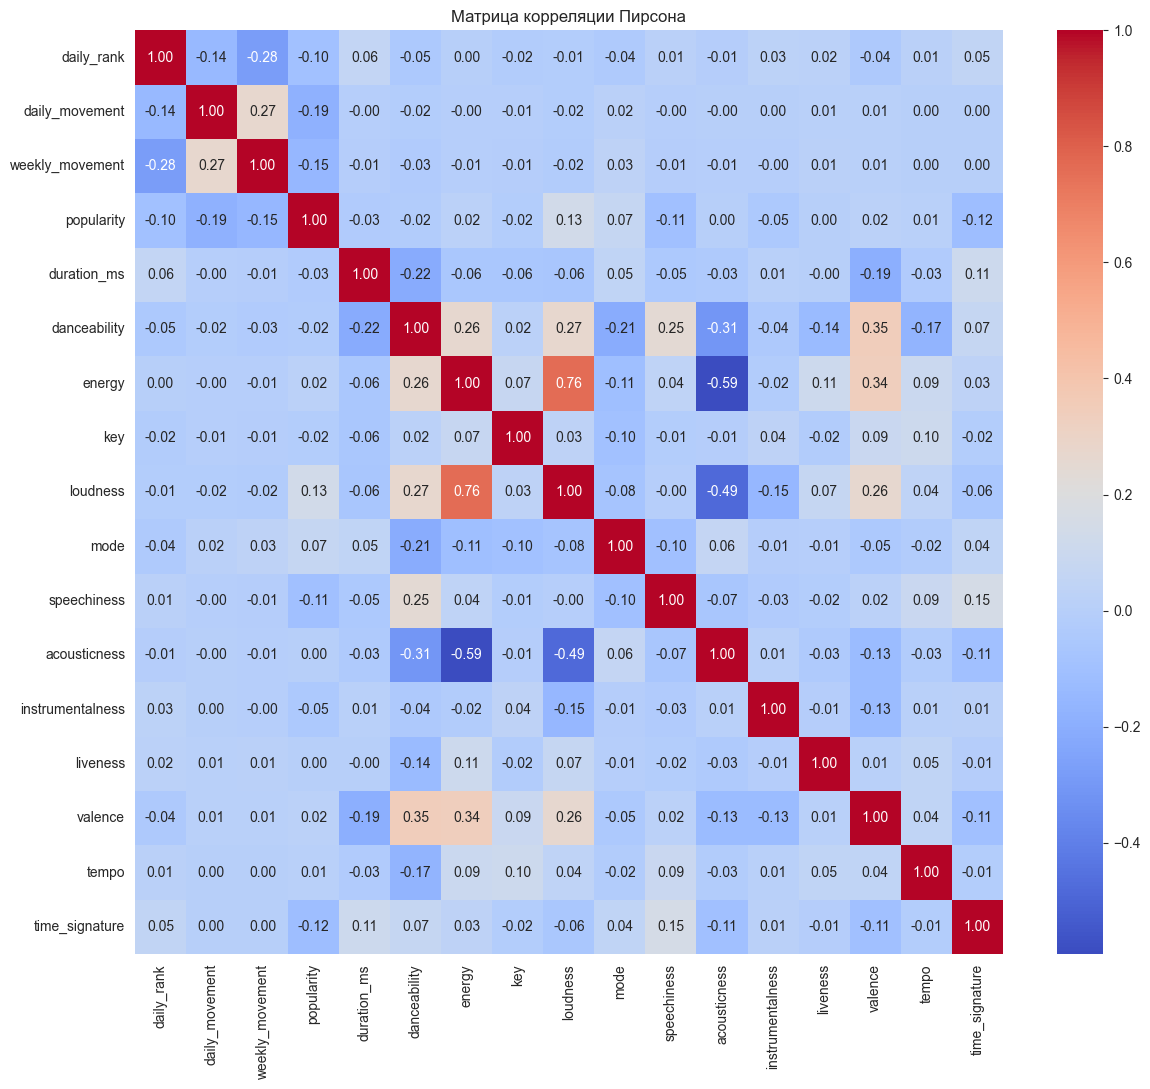

In [7]:
# 5.	Вычисление парных коэффициентов линейной корреляции.

# Загрузка данных


# Выберем только числовые колонки для корреляционного анализа
numerical_columns = ['daily_rank', 'daily_movement', 'weekly_movement', 'popularity',
                     'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
                     'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

# Вычисление матрицы корреляции
correlation_matrix = df[numerical_columns].corr()

# Вывод матрицы корреляции
print(correlation_matrix)

# Визуализация матрицы корреляции
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Матрица корреляции Пирсона')
plt.show()


In [8]:
# 6.	Методы отбора признаков (используя различные критерии: BIC, AIC, среднеквадратическое отклонение) 

# Настройка auto_arima для отбора признаков, основанного на AIC и BIC
# Это пример для временных рядов, где мы хотим найти наилучшую модель ARIMA
auto_arima_model = auto_arima(popularity_by_date, 
                              start_p=1, start_q=1,
                              test='adf',       # Используемый тип теста на стационарность ('adf' - тест Дики-Фуллера)
                              max_p=3, max_q=3, # Максимальные значения параметров p и q
                              m=1,              # Период сезонности
                              d=None,           # Порядок интеграции, если None, будет определен автоматически
                              seasonal=False,   # Указывает, следует ли учитывать сезонность
                              start_P=0, 
                              D=0, 
                              trace=True,
                              error_action='ignore',  
                              suppress_warnings=True, 
                              stepwise=True)

print(auto_arima_model.aic())
print(auto_arima_model.bic())

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Загрузка данных


X = df.drop(['popularity', 'name', 'artists', 'spotify_id', 'country', 'snapshot_date', 'album_name', 'album_release_date'], axis=1) # Удаление ненужных столбцов
y = df['popularity'] # Целевая переменная

model = LinearRegression()

rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X, y)

print("Выбранные признаки: %s" % fit.support_)

print("Ранжирование признаков: %s" % fit.ranking_)



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1052.129, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=406.546, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=408.316, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=408.295, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=410.277, Time=0.05 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.227 seconds
406.54632709167026
411.56804610470397
Выбранные признаки: [False False False  True False  True False False False False  True False
  True False False False  True]
Ранжирование признаков: [ 9  7  8  1 13  1  4 11  6  2  1  5  1 10  3 12  1]


Факторные загрузки:
 [[ 0.31269361  0.39377646  0.41457547  0.50304785 -0.02333579]
 [ 0.72384717  0.34110631  0.04200458 -0.22446695  0.0203261 ]
 [ 0.03298715  0.0029551   0.52090696  0.03829912 -0.03761113]
 [-0.81722877 -0.01624164 -0.07344658 -0.0353139   0.01903174]
 [ 0.00120316 -0.0799008  -0.02711327  0.01254741  0.3546457 ]
 [ 0.05394224  0.00962008 -0.014487   -0.30022577 -0.01299091]
 [ 0.13997939  0.71879593  0.00969591  0.01942261 -0.20843897]]
Собственные значения:
 [2.04909187 1.17676206 1.05116616 0.97073708 0.83868139 0.56743858
 0.34612286]


C:\Users\sulta\AppData\Local\Temp\ipykernel_18260\1773189454.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


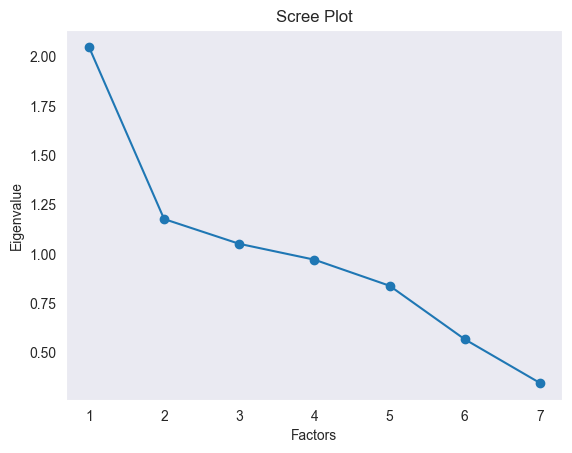

In [9]:
# 7.	Факторный анализ

# Выборка числовых переменных для факторного анализа
features_for_analysis = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
X = df[features_for_analysis]

# Проверка на пропущенные значения и их удаление или заполнение
# Например, можно заполнить пропущенные значения средними значениями
X.fillna(X.mean(), inplace=True)

# Нормализация данных, если это необходимо
# Можно использовать StandardScaler или MinMaxScaler из библиотеки sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# проведем факторный анализ
   
fa = FactorAnalyzer(n_factors=5, rotation='varimax')  # n_factors - предполагаемое количество факторов
fa.fit(X)

# Получение загрузок факторов
loadings = fa.loadings_
print("Факторные загрузки:\n", loadings)

# Получение собственных значений и вклад факторов
ev, v = fa.get_eigenvalues()
print("Собственные значения:\n", ev)

# Визуализация собственных значений (scree plot), чтобы определить количество факторов
plt.scatter(range(1, X.shape[1]+1), ev)
plt.plot(range(1, X.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

C:\dev\bigdatacoursework\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\dev\bigdatacoursework\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\dev\bigdatacoursework\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\dev\bigdatacoursework\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

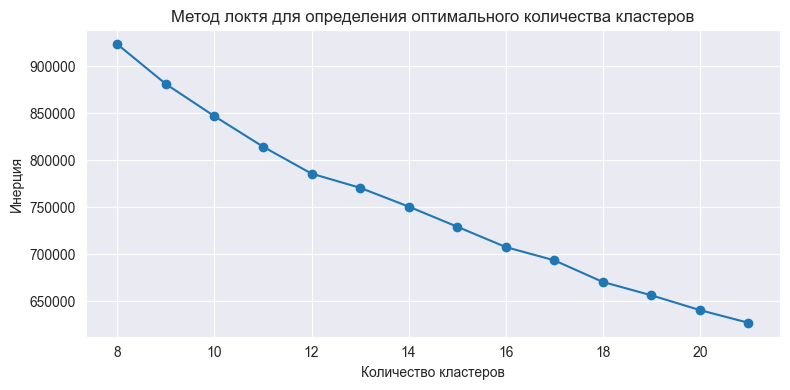

Оптимальное количество кластеров: 14


C:\dev\bigdatacoursework\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


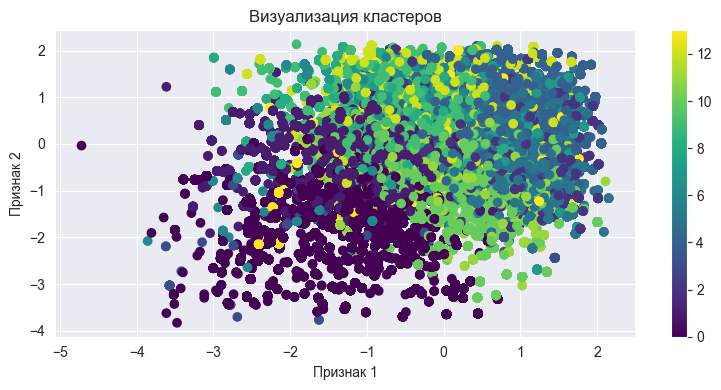

In [10]:
# 8.	Кластерный анализ

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Подготовка данных
features_for_clustering = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
X = df[features_for_clustering].dropna()

# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X
)

#Поиск оптимального количества кластеров с помощью метода локтя
inertia = []
for i in range(8, 22): # Пробуем от 1 до 10 кластеров
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

#Визуализация метода локтя
plt.figure(figsize=(8, 4))
plt.plot(range(8, 22), inertia, marker='o')
plt.title('Метод локтя для определения оптимального количества кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.tight_layout()
plt.show()

#Выбор количества кластеров на основе метода локтя
optimal_clusters = inertia.index(min(inertia)) + 1
print(f'Оптимальное количество кластеров: {optimal_clusters}')

#Применение KMeans с выбранным количеством кластеров
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

#Добавление меток кластеров в исходный датафрейм
df['Cluster'] = clusters

#Визуализация кластеров
plt.figure(figsize=(8, 4))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis') # Визуализация по первым двум характеристикам
plt.title('Визуализация кластеров')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.colorbar()
plt.tight_layout()
plt.show()


Epoch 1/100
7462/7462 [==============================] - 8s 926us/step - loss: 264.1591 - mae: 11.9297 - mse: 264.1591 - val_loss: 188.9612 - val_mae: 10.2923 - val_mse: 188.9612
Epoch 2/100
7462/7462 [==============================] - 7s 900us/step - loss: 175.4168 - mae: 9.5869 - mse: 175.4168 - val_loss: 164.2008 - val_mae: 8.8773 - val_mse: 164.2008
Epoch 3/100
7462/7462 [==============================] - 7s 904us/step - loss: 159.5304 - mae: 8.8785 - mse: 159.5304 - val_loss: 152.5092 - val_mae: 8.5657 - val_mse: 152.5092
Epoch 4/100
7462/7462 [==============================] - 7s 937us/step - loss: 149.2036 - mae: 8.4226 - mse: 149.2036 - val_loss: 146.3707 - val_mae: 8.1521 - val_mse: 146.3707
Epoch 5/100
7462/7462 [==============================] - 7s 928us/step - loss: 139.9184 - mae: 8.0303 - mse: 139.9184 - val_loss: 136.4986 - val_mae: 7.6632 - val_mse: 136.4986
Epoch 6/100
7462/7462 [==============================] - 7s 937us/step - loss: 132.7246 - mae: 7.7168 - mse: 132.

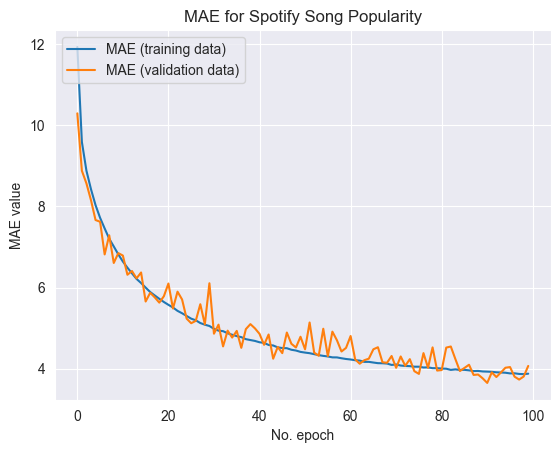

In [11]:
# 9.	Получение уравнений регрессии, представляющих собой зависимость результативных показателей эффективности работы предприятия от влияющих на него производственно-экономических факторов (нейронная сеть (рассмотреть различные методы формирования нейронных сетей)).

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Предполагается, что df – это ваш DataFrame
# X - набор входных признаков, y - целевая переменная

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu')) # Входной слой и первый скрытый слой
model.add(Dense(64, activation='relu')) # Второй скрытый слой
model.add(Dense(32, activation='relu')) # Третий скрытый слой
model.add(Dense(1, activation='linear')) # Выходной слой

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse'])

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

scores = model.evaluate(X_test, y_test, verbose=0)
print(f"{model.metrics_names[1]}: {scores[1]}") # Mean Absolute Error
print(f"{model.metrics_names[2]}: {scores[2]}") # Mean Squared Error

y_pred = model.predict(X_test)

import matplotlib.pyplot as plt

plt.plot(history.history['mae'], label='MAE (training data)')
plt.plot(history.history['val_mae'], label='MAE (validation data)')
plt.title('MAE for Spotify Song Popularity')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [12]:
# 10.	Дисперсионный анализ

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Загрузка данных
# df = pd.read_csv('spotify_top_songs.csv')  # Убедитесь, что df уже загружен

# Предполагаем, что 'is_explicit' - это булева колонка в df, которая содержит информацию о явных текстах песен
# и 'popularity' - это колонка, которая содержит данные о популярности песен

# Подготовка данных для ANOVA
# Убедитесь, что данные не содержат пропущенных значений
df.dropna(subset=['is_explicit', 'popularity'], inplace=True)

# Проведение однофакторного ANOVA
# Формула 'popularity ~ C(is_explicit)' означает, что мы хотим тестировать влияние наличия явных текстов на популярность
model = ols('popularity ~ C(is_explicit)', data=df).fit()
anova_results = sm.stats.anova_lm(model, typ=2)

print(anova_results)



                      sum_sq        df            F  PR(>F)
C(is_explicit)  1.336674e+06       1.0  5317.053084     0.0
Residual        8.336570e+07  331614.0          NaN     NaN


Mean Squared Error: 243.1738763378332
R^2 Score: 0.04505699404084884
                  Coefficient
danceability        -3.074359
energy             -16.969298
loudness             1.583548
speechiness        -15.866013
acousticness         1.060240
instrumentalness    -1.392888
liveness            -0.474677
valence              1.599484
tempo                0.011024


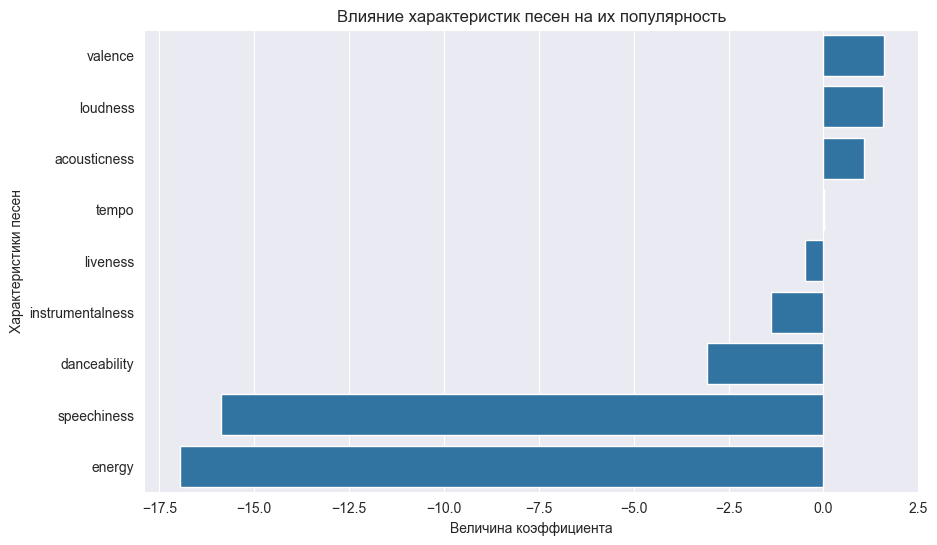

In [13]:
# 11.	Оптимизация значений выходных факторов и результативных показателей эффективности с целью принятия управляющего решения.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
# df = pd.read_csv('spotify_top_songs.csv') # Предполагается, что df уже загружен

# Выборка входных и выходных переменных
X = df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
y = df['popularity']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Оценка модели
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Вывод коэффициентов модели
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Вывод коэффициентов модели (предполагается, что модель уже обучена)
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False)

# Создание столбчатой диаграммы
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients.Coefficient, y=coefficients.index)
plt.title('Влияние характеристик песен на их популярность')
plt.xlabel('Величина коэффициента')
plt.ylabel('Характеристики песен')

# Отображение графика
plt.show()
